# Data Exploration on Travel Pattern Recognition

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
%matplotlib inline
import seaborn as sns; sns.set()  # for plot styling

In [2]:
df = pd.concat(
    map(pd.read_csv, ['derivedtimevars.csv', 'episode.csv','household.csv','individual.csv','wide.csv','wksched.csv']), ignore_index=True)

FileNotFoundError: [Errno 2] No such file or directory: 'derivedtimevars.csv'

In [3]:
df.describe()

,serial,pnum,daynum,strata,psu,HhOut,IndOut,DMFlag,IMonth,IYear,DVAge,DayNum_DiaryDay,DiaryDay_Act,DiaryDateDiff,dmonth,dyear,ddayw,DiaryType,WhenDiary,AfterDiaryDay,WhereStart,WhereEnd,RushedD,Ordinary,KindOfDay,Trip,dia_wt_a,dia_wt_b,dml1_0,epnum,tid,eptime,whatdoing,What_Oth1,What_Oth2,What_Oth3,WhereWhen,Device,DM014,DM016,...,act1_5,act1_6,act1_7,act1_8,act1_9,act1_10,act1_11,act1_12,act1_13,act1_14,act1_15,act1_16,act1_17,act1_18,act1_19,act1_20,act1_21,act1_22,act1_23,act1_24,act1_25,act1_26,act1_27,act1_28,act1_29,act1_30,act1_31,act1_32,act1_33,act1_34,act1_35,act1_36,act1_37,dvage,flag_impute_date,imonth,iyear,dow1_sched,sched_diaryday1,t0400_0415_d1
count,8.400000e+01,70.000000,42.000000,84.000000,84.000000,70.000000,56.000000,56.000000,70.00000,70.0,56.000000,42.000000,42.000000,42.0,42.0,42.0,42.000000,42.000000,42.000000,42.000000,42.0,42.0,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,14.000000,14.0000,14.000000,14.000000,14.000000,14.000000,14.0,14.0,14.0,14.000000,28.000000,28.000000,...,14.0,14.000000,14.0,14.0,14.0,14.000000,14.000000,14.000000,14.00000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.00000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,1.101144e+07,1.600000,1.333333,76.916667,82.083333,324.285714,13.321429,-0.214286,11.00000,2014.0,52.107143,1.333333,3.952381,0.0,12.0,2014.0,1.571429,1.190476,1.238095,-0.857143,1.0,1.0,1.857143,1.428571,3.523810,1.047619,1.620507,1.440692,622.142857,7.5000,17.785714,21.428571,3027.785714,2348.500000,-9.0,-9.0,11.0,0.142857,0.285714,0.321429,...,110.0,124.285714,110.0,110.0,110.0,167.142857,167.142857,724.928571,1297.00000,1504.142857,2769.857143,3193.714286,2133.642857,1962.142857,845.714286,874.285714,852.857143,867.142857,1216.50000,2080.714286,3147.142857,3160.000000,3082.928571,3440.071429,3440.071429,3440.071429,2364.285714,1975.785714,1977.928571,1926.428571,2701.428571,3182.142857,4259.214286,45.142857,-1.000000,9.428571,2014.714286,5.071429,1.928571,-0.285714
std,1.702889e+03,0.891181,0.477119,51.695170,55.123347,209.184555,5.387214,3.415016,1.37261,0.0,19.317141,0.477119,1.886439,0.0,0.0,0.0,0.859463,0.594204,0.758996,0.646621,0.0,0.0,0.354169,0.500870,2.109654,0.215540,0.657073,0.189657,82.385452,4.1833,7.007453,26.849192,2438.554022,3848.685885,0.0,0.0,0.0,0.363137,0.460044,0.547964,...,0.0,53.452248,0.0,0.0,0.0,93.761446,93.761446,2157.847234,2933.18147,2960.390849,3959.644523,4318.488418,3795.325822,3259.669848,1097.975159,1079.606155,1071.098850,1083.948825,2154.94618,2973.577137,2775.041035,2777.591652,3059.725992,2978.205460,2978.205460,2978.205460,2564.125955,2307.042935,2306.143983,1792.731509,2167.639117,2356.405929,3576.314093,14.211897,1.037749,5.003296,0.468807,1.859044,0.267261,0.994490
min,1.101090e+07,1.000000,1.000000,-2.000000,-2.000000,110.000000,-2.000000,-6.000000,9.00000,2014.0,1.000000,1.000000,1.000000,0.0,12.0,2014.0,1.000000,1.000000,1.000000,-1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,0.531083,1.012621,450.000000,1.0000,1.000000,10.000000,110.000000,-9.000000,-9.0,-9.0,11.0,0.000000,0.000000,0.000000,...,110.0,110.000000,110.0,110.0,110.0,110.000000,110.000000,110.000000,110.00000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.00000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,111.000000,111.000000,111.000000,210.000000,300.000000,310.000000,210.000000,16.000000,-2.000000,6.000000,2014.000000,1.000000,1.000000,-1.000000
25%,1.101092e+07,1.000000,1.000000,-2.000000,-2.000000,210.000000,11.000000,-0.750000,9.00000,2014.0,48.000000,1.000000,3.000000,0.0,12.0,2014.0,1.000000,1.000000,1.000000,-1.000000,1.0,1.0,2.000000,1.000000,3.000000,1.000000,0.902827,1.258827,555.000000,4.2500,14.250000,10.000000,1010.00

In [30]:
df.head(10)

,serial,pnum,daynum,strata,psu,HhOut,IndOut,DMFlag,IMonth,IYear,DVAge,DayNum_DiaryDay,DPday,DiaryDate_Act,DiaryDay_Act,DiaryDateDiff,dmonth,dyear,ddayw,DiaryType,WhenDiary,AfterDiaryDay,WhereStart,WhereEnd,RushedD,Ordinary,KindOfDay,Trip,dia_wt_a,dia_wt_b,dml1_0,epnum,tid,eptime,whatdoing,What_Oth1,What_Oth2,What_Oth3,WhereWhen,Device,...,act1_9,act1_10,act1_11,act1_12,act1_13,act1_14,act1_15,act1_16,act1_17,act1_18,act1_19,act1_20,act1_21,act1_22,act1_23,act1_24,act1_25,act1_26,act1_27,act1_28,act1_29,act1_30,act1_31,act1_32,act1_33,act1_34,act1_35,act1_36,act1_37,wks_wt,dvage,flag_impute_date,imonth,iyear,flag_impute_dow,dow1_sched,date1_sched,sched_diaryday1,t0400_0415_d1,compl_wk
0,11011202.0,1.0,1.0,110.0,117.0,210.0,11.0,2.0,12.0,2014.0,48.0,1.0,12/11/2014,12/11/2014,5.0,0.0,12.0,2014.0,1.0,1.0,1.0,-1.0,1.0,1.0,2.0,2.0,3.0,1.0,2.021182,1.581180,450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11011202.0,1.0,2.0,110.0,117.0,210.0,11.0,2.0,12.0,2014.0,48.0,2.0,12/14/2014,12/14/2014,1.0,0.0,12.0,2014.0,3.0,1.0,1.0,-1.0,1.0,1.0,2.0,2.0,3.0,1.0,0.861148,1.581180,670.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11011202.0,4.0,1.0,110.0,117.0,210.0,11.0,3.0,12.0,2014.0,13.0,1.0,12/11/2014,12/11/2014,5.0,0.0,12.0,2014.0,1.0,3.0,1.0,-1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.057808,1.583635,710.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11011202.0,4.0,2.0,110.0,117.0,210.0,11.0,3.0,12.0,2014.0,13.0,2.0,12/14/2014,12/14/2014,1.0,0.0,12.0,2014.0,3.0,3.0,1.0,-1.0,1.0,1.0,2.0,1.0,3.0,1.0,0.902827,1.583635,700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11011203.0,1.0,1.0,110.0,117.0,210.0,11.0,2.0,12.0,2014.0,75.0,1.0,12/7/2014,12/7/2014,1.0,0.0,12.0,2014.0,3.0,1.0,1.0,-1.0,1.0,1.0,2.0,1.0,3.0,1.0,0.698075,1.258827,650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,11011203.0,1.0,2.0,110.0,117.0,210.0,11.0,2.0,12.0,2014.0,75.0,2.0,12/9/2014,12/9/2014,3.0,0.0,12.0,2014.0,1.0,1.0,1.0,-1.0,1.0,1.0,2.0,1.0,7.0,2.0,2.604367,1.258827,730.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,11011207.0,1.0,1.0,110.0,117.0,110.0,11.0,1.0,12.0,2014.0,68.0,1.0,12/3/2014,12/3/2014,4.0,0.0,12.0,2014.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,7.0,1.0,1.501065,1.012621,690.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,11011207.0,1.0,2.0,110.0,117.0,110.0,11.0,1.0,12.0,2014.0,68.0,2.0,12/6/2014,12/6/2014,7.0,0.0,12.0,2014.0,2.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,7.0,1.0,0.531083,1.012621,690.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,11011207.0,2.0,1.0,110.0,117.0,110.0,11.0,1.0,12.0,2014.0,74.0,1.0,12/3/2014,12/3/2014,4.0,0.0,12.0,2014.0,1.0,1.0,1.0,-1.0,1.0,1.0,2.0,1.0,7.0,1.0,2.296183,1.414965,590.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [4]:
len(df)

4803

In [5]:
df.dtypes

serial             float64
pnum               float64
daynum             float64
strata             float64
psu                float64
                    ...   
dow1_sched         float64
date1_sched         object
sched_diaryday1    float64
t0400_0415_d1      float64
compl_wk            object
Length: 510, dtype: object

In [87]:
df.isnull().sum()

serial             4719
pnum               4733
daynum             4761
strata             4719
psu                4719
                   ... 
dow1_sched         4789
date1_sched        4789
sched_diaryday1    4789
t0400_0415_d1      4789
compl_wk           4789
Length: 510, dtype: int64

In [88]:
df.fillna({'DMFlag':0}, inplace=True)
df.DMFlag.isnull().sum()

0

In [8]:
df.DVAge.unique()

array([48., 13., 75., 68., 74., 69., 60., nan, 80., 71., 55., 62., 52.,
       18., 36., 37.,  1., 67., 21., 49.])

In [89]:
len(df.DVAge.unique())

20

In [90]:
df.DiaryDay_Act.unique()

array([ 5.,  1.,  3.,  4.,  7., nan])

In [91]:
top_host=df.IYear.value_counts().head(10)
top_host

2014.0    70
Name: IYear, dtype: int64

In [93]:
top_host_check=df.DVAge.max()
top_host_check

80.0

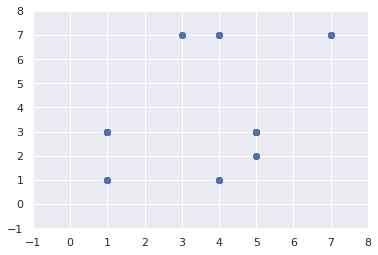

In [38]:
plt.scatter(df['DiaryDay_Act'],df['KindOfDay'])
plt.xlim(-1,8)
plt.ylim(-1,8)
plt.show()

In [50]:
 x = df.iloc[:,1:3]

In [41]:
pip install KMeans

  Created wheel for KMeans: filename=kmeans-1.0.2-cp37-cp37m-linux_x86_64.whl size=11790 sha256=e8e3b6ba6f3cbef7db258d866559af2373ea36ad91bb7f70a0905a405ecfdd6c
  Stored in directory: /root/.cache/pip/wheels/4a/26/51/688c6987fdc6a10c6186c3817f2ef7c92c50c078a900525c0e
Successfully built KMeans


In [103]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

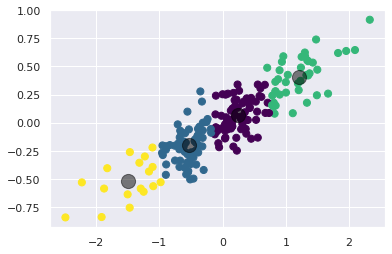

In [105]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [54]:
x

,pnum,daynum
0,1.0,1.0
1,1.0,2.0
2,4.0,1.0
3,4.0,2.0
4,1.0,1.0
...,...,...
4798,2.0,NaN
4799,3.0,NaN
4800,2.0,NaN
4801,3.0,NaN


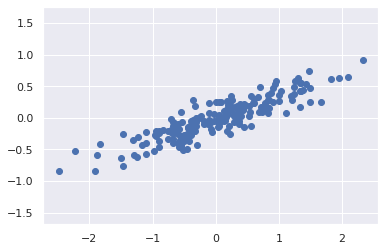

In [63]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [65]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [66]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


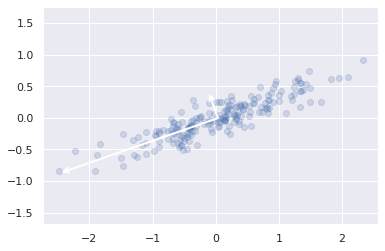

In [67]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [68]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


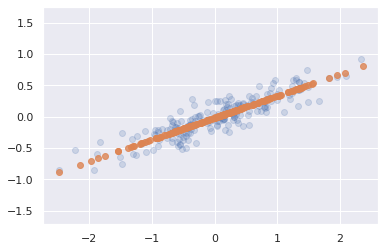

In [69]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

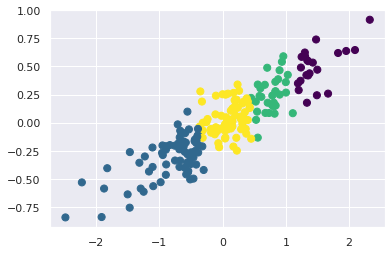

In [72]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        labels = pairwise_distances_argmin(X, centers)
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

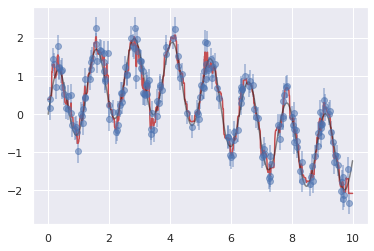

In [85]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

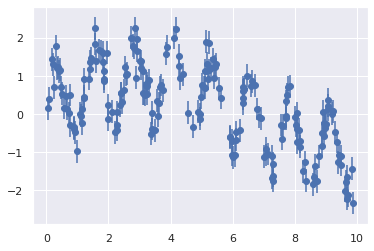

In [84]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');